In [137]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas import Series
import warnings
warnings.filterwarnings("ignore")

data2 = pd.read_csv(r"C:\Users\Arine\Downloads\bankpep.csv")

AttributeError: 'Line2D' object has no property 'xlabel'

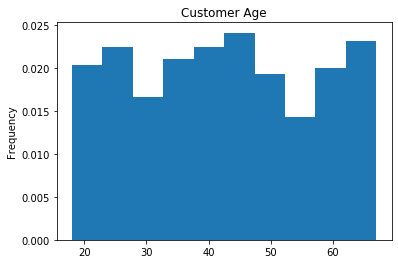

In [136]:
#（1）客户年龄分布的直方图和密度图；
#data2['age'].plot(kind='hist',bins=9,title='Clients Age Distribution', density=True)
#plt.show()
#data2['age'].plot(kind='kde',title='Clients Age Distribution', xlim=[0,80],ylim=[0.000,0.025],style = 'r-')
#plt.show()

data2['age'].plot(kind='hist',bins=10,title='Customer Age',density=True) #绘图 density normed=True
data2['age'].plot(kind='kde',title='Customer Age',xlabel='Age',ylim=[0.000,0.025],style = 'r-')   #绘制密度图

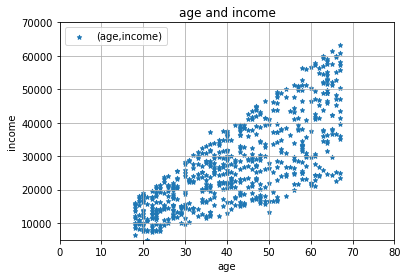

In [104]:
#（2）客户年龄和收入关系的散点图；
data2.plot(kind='scatter',x='age',y='income',title='age and income', marker='*',grid=True, xlim=[0,80], ylim=[5000,70000], label='(age,income)')
plt.show()

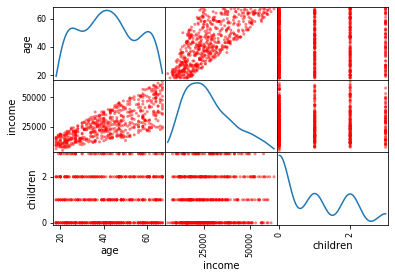

In [131]:
#（3）绘制散点图观察账户（年龄，收入，孩子数）之间的关系，对角线显示直方图；
data23 = data2[['age', 'income','married','children']]  #准备数据
pd.plotting.scatter_matrix(data22,diagonal='kde',color='r')  #绘图 密度图
plt.show()

<Figure size 432x144 with 0 Axes>

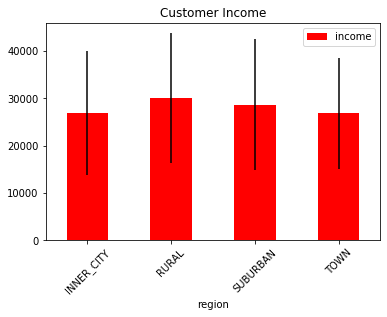

In [120]:
#（4）按区域展示平均收入的柱状图，并显示标准差；

data24 = data2.groupby(by='region')[['region','income']]
mean = data24.mean() #均值,按列
std = data24.std()   #标准差
fig = plt.figure(figsize = (6,2)) #设置图片大小
plt.subplots_adjust(wspace = 0.6) #设置两个图之间的纵向间隔
#绘制均值的垂直和水平柱状图，标准差使用误差线来表示，蓝灰色，刻度标签旋转45°
mean.plot(kind='bar',yerr=std,color='red',title ='Customer Income', rot=45)





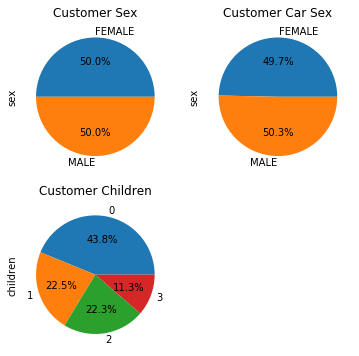

In [122]:
#（5）多子图绘制：账户中性别占比饼图，有车的性别占比饼图，按孩子数的账户占比饼图；

sex_data = data2.groupby(['sex'])['sex'].count()
car_data = data2[data2['car'] =='YES'].groupby(['sex'])['sex'].count()
children_data = data2.groupby(['children'])['children'].count()
fig = plt.figure(figsize = (6,6))
ax51 = fig.add_subplot(2,2,1)
sex_data.plot(kind = 'pie', title = 'Customer Sex', autopct = '%1.1f%%', ax = ax51)
ax52 = fig.add_subplot(2,2,2)
car_data.plot(kind = 'pie', title = 'Customer Car Sex', autopct = '%1.1f%%', ax = ax52)
ax53 = fig.add_subplot(2,2,3)
children_data.plot(kind = 'pie', title = 'Customer Children', autopct = '%1.1f%%', ax = ax53)
plt.show()

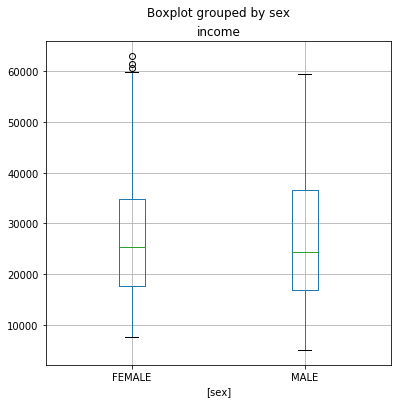

In [117]:
#（6）各性别收入的箱形图。

data26 = data2[['sex','income']]
data26.boxplot(by='sex',figsize=(6,6))
plt.show()